# CAPSTONE PROJECT - Certified Data Analyst
# CASE STUDY 1


## 1. Connect Colab to Google Drive

In [1]:
# Mengakses google drive ke dalam google colaboratory
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


## 2. Import Packages

In [2]:
import pandas as pd
import sqlite3
import os
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import date as dt
import numpy as np

In [3]:
# Inisiasi directory tempat data akan dibaca dan disimpan
path = "gdrive/MyDrive/CDA_Narasiodata/CAPSTONE PROJECT/Data/"

In [4]:
# Cek isi direktori
files = os.listdir(path)
files

['CoffeeShop_Dataset.db',
 'Data Understanding.xlsx',
 'product.csv',
 'generations.csv',
 'pastry inventory.csv',
 'sales outlet.csv',
 'customer.csv',
 'sales reciepts.csv']

## 3. Connect SQLite to Python

In [5]:
conn = sqlite3.connect(path + 'CoffeeShop_Dataset.db')

cur = conn.cursor()

## 4. Data Preparation Using SQL

In [6]:
# read all tables in database
cur.execute('''SELECT name 
               FROM sqlite_master 
               WHERE type='table'
            ''')

print(cur.fetchall())

[('sales outlet',), ('pastry inventory',), ('product',), ('generations',), ('sales reciepts',), ('customer',)]


In [7]:
# jika menggunakan pandas
pd.read_sql_query("SELECT name FROM sqlite_master WHERE type='table'", conn)

,name
0,sales outlet
1,pastry inventory
2,product
3,generations
4,sales reciepts
5,customer


In [8]:
# menampilkan tabel customer
pd.read_sql_query("SELECT * FROM customer", conn)

,customer_id,home_store,customer_first-name,customer_email,customer_since,loyalty_card_number,birthdate,gender,birth_year
0,1,3,Kelly Key,Venus@adipiscing.edu,2017-01-04,908-424-2890,1950-05-29,M,1950
1,2,3,Clark Schroeder,Nora@fames.gov,2017-01-07,032-732-6308,1950-07-30,M,1950
2,3,3,Elvis Cardenas,Brianna@tellus.edu,2017-01-10,459-375-9187,1950-09-30,M,1950
3,4,3,Rafael Estes,Ina@non.gov,2017-01-13,576-640-9226,1950-12-01,M,1950
4,5,3,Colin Lynn,Dale@Integer.com,2017-01-15,344-674-6569,1951-02-01,M,1951
...,...,...,...,...,...,...,...,...,...
2241,8497,8,Rae,Kylie@facilisi.org,2017-01-06,081-440-6679,1977-12-10,F,1977
2242,8498,8,April,Daniel@placerat.us,2019-01-20,705-545-5246,2000-12-07,N,2000
2243,8499,8,Clementine,Dieter@ac.us,2017-11-09,297-550-7776,1996-06-04,F,1996
2244,8500,8,Linda,Dillon@pretium.gov,2017-08-21,255-202-7435,1990-03-01,N,1990


In [9]:
# menghitung total customer berdasarkan generation
pd.read_sql_query("""
SELECT g.generation, 
       COUNT(g.generation) as total 
FROM customer c 
LEFT JOIN generations g ON g.birth_year = c.birth_year 
GROUP BY generation
                  """, conn)

,generation,total
0,Baby Boomers,529
1,Gen X,522
2,Gen Z,382
3,Older Millennials,515
4,Younger Millennials,298


In [10]:
# menghitung total customer berdasarkan gender
pd.read_sql_query("""
SELECT gender,
       COUNT(gender) as total 
FROM customer  
GROUP BY gender
                  """, conn)

,gender,total
0,F,977
1,M,726
2,N,543


In [11]:
# menampilkan tabel product
pd.read_sql_query("SELECT * FROM product", conn)

,product_id,product_group,product_category,product_type,product,product_description,unit_of_measure,current_wholesale_price,current_retail_price,tax_exempt_yn,promo_yn,new_product_yn
0,1,Whole Bean/Teas,Coffee beans,Organic Beans,Brazilian - Organic,It's like Carnival in a cup. Clean and smooth.,12 oz,14.40,$18.00,Y,N,N
1,2,Whole Bean/Teas,Coffee beans,House blend Beans,Our Old Time Diner Blend,Out packed blend of beans that is reminiscent ...,12 oz,14.40,$18.00,Y,N,N
2,3,Whole Bean/Teas,Coffee beans,Espresso Beans,Espresso Roast,Our house blend for a good espresso shot.,1 lb,11.80,$14.75,Y,N,N
3,4,Whole Bean/Teas,Coffee beans,Espresso Beans,Primo Espresso Roast,Our primium single source of hand roasted beans.,1 lb,16.36,$20.45,Y,N,N
4,5,Whole Bean/Teas,Coffee beans,Gourmet Beans,Columbian Medium Roast,A smooth cup of coffee any time of day.,1 lb,12.00,$15.00,Y,N,N
...,...,...,...,...,...,...,...,...,...,...,...,...
83,84,Add-ons,Flavours,Regular syrup,Chocolate syrup,Bursting with chocolate flavour,pump,0.04,$0.80,Y,N,N
84,85,Beverages,Coffee,Specialty coffee,Rio Nights,2 shots of Ouro Brasilerio and pure cane sugar...,6 oz,1.20,$6.00,Y,N,Y
85,87,Beverages,Coffee,Barista Espresso,Ouro Brasileiro shot,From Rio,1.5 oz,0.60,$3.00,Y,N,N
86,88,Beverages,Coffee,Barista Espresso,Ouro Brasileiro shot promo,Ouro promo,16 oz,0.42,$2.10,Y,Y,N


In [12]:
# menampilkan tabel generations
pd.read_sql_query("SELECT * FROM generations", conn)

,birth_year,generation
0,1946,Baby Boomers
1,1947,Baby Boomers
2,1948,Baby Boomers
3,1949,Baby Boomers
4,1950,Baby Boomers
...,...,...
65,2011,Gen Z
66,2012,Gen Z
67,2013,Gen Z
68,2014,Gen Z


In [13]:
# menampilkan tabel pastry inventory
pd.read_sql_query("SELECT * FROM 'pastry inventory' ORDER BY waste", conn)

,sales_outlet_id,transaction_date,product_id,start_of_day,quantity_sold,waste,% waste
0,3,4/5/2019,69,18,0,0,0
1,3,4/18/2019,69,18,0,0,0
2,5,4/12/2019,73,18,18,0,0%
3,8,4/14/2019,69,18,18,0,0%
4,5,4/20/2019,70,18,17,1,6%
...,...,...,...,...,...,...,...
302,8,4/8/2019,72,48,3,45,94%
303,8,4/10/2019,72,48,3,45,88%
304,8,4/11/2019,72,48,2,46,88%
305,8,4/13/2019,72,48,2,46,96%


In [14]:
# menampilkan tabel sales outlet
pd.read_sql_query("SELECT * FROM 'sales outlet'", conn)

,sales_outlet_id,sales_outlet_type,store_square_feet,store_address,store_city,store_state_province,store_telephone,store_postal_code,store_longitude,store_latitude,manager,Neighorhood
0,2,warehouse,3400,164-14 Jamaica Ave,Jamaica,NY,972-871-0402,11432,-73.795168,40.705226,NaN,Jamaica
1,3,retail,1300,32-20 Broadway,Long Island City,NY,777-718-3190,11106,-73.924008,40.761196,6.0,Astoria
2,4,retail,1300,604 Union Street,Brooklyn,NY,619-347-5193,11215,-73.983984,40.677645,11.0,Gowanus
3,5,retail,900,100 Church Street,New York,NY,343-212-5151,10007,-74.010130,40.713290,16.0,Lower Manhattan
4,6,retail,1000,122 E Broadway,New York,NY,613-555-4989,10002,-73.992687,40.713852,21.0,Lower East Side
5,7,retail,1200,224 E 57th Street,New York,NY,287-817-2330,10021,-73.960000,40.770000,26.0,Upper East Side
6,8,retail,1500,687 9th Avenue,New York,NY,652-212-7020,10036,-73.990338,40.761887,31.0,Hell's Kitchen
7,9,retail,1700,175 8th Avenue,New York,NY,242-212-0080,10011,-74.000502,40.742760,36.0,Chelsea
8,10,retail,1600,183 W 10th Street,New York,NY,674-646-6434,10014,-74.002722,40.734367,41.0,Greenwich Village


In [15]:
# menampilkan tabel sales reciepts
pd.read_sql_query("SELECT * FROM 'sales reciepts'", conn) # secara otomatis diurutkan berdasarkan transaction_date

,transaction_id,transaction_date,transaction_time,sales_outlet_id,staff_id,customer_id,instore_yn,order,line_item_id,product_id,quantity,line_item_amount,unit_price,promo_item_yn
0,7,2019-04-01,12:04:43,3,12,558,N,1,1,52,1,2.50,2.50,N
1,11,2019-04-01,15:54:39,3,17,781,N,1,1,27,2,7.00,3.50,N
2,19,2019-04-01,14:34:59,3,17,788,Y,1,1,46,2,5.00,2.50,N
3,32,2019-04-01,16:06:04,3,12,683,N,1,1,23,2,5.00,2.50,N
4,33,2019-04-01,19:18:37,3,17,99,Y,1,1,34,1,2.45,2.45,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49889,753,2019-04-29,16:51:58,8,42,0,N,1,1,30,1,3.00,3.00,N
49890,756,2019-04-29,16:51:14,8,42,8412,Y,1,1,25,2,4.40,2.20,N
49891,759,2019-04-29,11:17:36,8,15,0,Y,1,1,31,1,2.20,2.20,N
49892,763,2019-04-29,15:45:52,8,45,8030,N,1,1,44,2,5.00,2.50,N


In [16]:
# menampilkan tabel sales reciepts berdasarkan urutan transaction_id
pd.read_sql_query("""
SELECT * 
FROM 'sales reciepts' 
ORDER BY transaction_id
                  """, conn)

,transaction_id,transaction_date,transaction_time,sales_outlet_id,staff_id,customer_id,instore_yn,order,line_item_id,product_id,quantity,line_item_amount,unit_price,promo_item_yn
0,1,2019-04-03,15:55:36,5,12,5250,Y,1,1,58,1,3.50,3.50,N
1,1,2019-04-03,13:26:51,8,42,8349,N,1,1,44,1,2.50,2.50,N
2,1,2019-04-03,13:26:51,8,42,8349,N,1,5,70,1,3.25,3.25,N
3,1,2019-04-05,17:27:40,3,17,169,N,1,1,56,1,2.55,2.55,N
4,1,2019-04-05,17:27:40,3,17,169,N,1,5,70,1,3.25,3.25,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49889,4199,2019-04-29,12:14:16,3,16,0,Y,1,1,59,1,4.50,4.50,N
49890,4200,2019-04-23,09:22:09,3,16,773,N,1,1,61,1,4.75,4.75,N
49891,4201,2019-04-24,19:00:03,3,20,0,N,1,1,24,2,6.00,3.00,N
49892,4202,2019-04-25,07:40:55,3,20,0,Y,1,1,50,1,2.50,2.50,N


In [17]:
# menampilkan customer yang non-member (customer_id = 0)
pd.read_sql_query("""
SELECT customer_id,
       transaction_id
FROM 'sales reciepts'
WHERE customer_id = 0
ORDER BY transaction_id
                  """, conn)

,customer_id,transaction_id
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
25028,0,4197
25029,0,4198
25030,0,4199
25031,0,4201


In [18]:
# menghitung total customer non-member
pd.read_sql_query("""
SELECT customer_id,
       COUNT(customer_id) as total_cust_nonmember
FROM 'sales reciepts'
WHERE customer_id = 0
                  """, conn)

,customer_id,total_cust_nonmember
0,0,25033


In [19]:
# mengitung jumlah transaction_id yang lebih dari 1
pd.read_sql_query("""
SELECT transaction_id, 
       COUNT(transaction_id) as total, 
       sales_outlet_id 
FROM 'sales reciepts' 
GROUP BY transaction_id
HAVING COUNT(transaction_id) > 1
                  """, conn)

,transaction_id,total,sales_outlet_id
0,1,57,8
1,2,54,8
2,3,59,8
3,4,54,8
4,5,62,8
...,...,...,...
3054,4136,2,3
3055,4163,2,3
3056,4166,2,3
3057,4179,2,3


Terlihat bahwa terdapat transaction_id yang tidak unik/lebih dari 1

In [20]:
pd.read_sql_query("""
SELECT *
FROM 'sales reciepts'
WHERE transaction_id = 1
                  """, conn)

,transaction_id,transaction_date,transaction_time,sales_outlet_id,staff_id,customer_id,instore_yn,order,line_item_id,product_id,quantity,line_item_amount,unit_price,promo_item_yn
0,1,2019-04-03,15:55:36,5,12,5250,Y,1,1,58,1,3.50,3.50,N
1,1,2019-04-03,13:26:51,8,42,8349,N,1,1,44,1,2.50,2.50,N
2,1,2019-04-03,13:26:51,8,42,8349,N,1,5,70,1,3.25,3.25,N
3,1,2019-04-05,17:27:40,3,17,169,N,1,1,56,1,2.55,2.55,N
4,1,2019-04-05,17:27:40,3,17,169,N,1,5,70,1,3.25,3.25,N
5,1,2019-04-06,16:05:09,3,12,173,N,1,1,23,2,5.00,2.50,N
6,1,2019-04-07,10:16:40,3,20,608,N,1,1,45,1,3.00,3.00,N
7,1,2019-04-07,07:08:39,5,29,5315,Y,1,1,31,2,4.40,2.20,N
8,1,2019-04-07,08:46:29,8,44,0,N,1,1,51,1,3.00,3.00,N
9,1,2019-04-07,08:46:29,8,44,0,N,1,4,69,1,3.25,3.25,N


In [21]:
# menampilkan total transaksi di setiap outlet
pd.read_sql_query("""
SELECT so.store_address, 
       so.store_city, 
       so.sales_outlet_type, 
       so.sales_outlet_id,
       COUNT(sr.transaction_id) as total_trans
FROM 'sales reciepts' sr 
LEFT JOIN 'sales outlet' so ON sr.sales_outlet_id = so.sales_outlet_id 
GROUP BY so.sales_outlet_id
                  """, conn)

,store_address,store_city,sales_outlet_type,sales_outlet_id,total_trans
0,32-20 Broadway,Long Island City,retail,3,16829
1,100 Church Street,New York,retail,5,15994
2,687 9th Avenue,New York,retail,8,17071


In [22]:
pd.read_sql_query("""
SELECT customer_id,
       transaction_id,
       product_id,
       sales_outlet_id
FROM 'sales reciepts'
ORDER BY sales_outlet_id
                  """, conn)

,customer_id,transaction_id,product_id,sales_outlet_id
0,558,7,52,3
1,781,11,27,3
2,788,19,46,3
3,683,32,23,3
4,99,33,34,3
...,...,...,...,...
49889,0,753,30,8
49890,8412,756,25,8
49891,0,759,31,8
49892,8030,763,44,8


In [23]:
# menghitung total tiap produk pada sales_outlet_id 3
pd.read_sql_query("""
SELECT sales_outlet_id,
       product_id,
       COUNT(product_id) as total
FROM 'sales reciepts'
WHERE sales_outlet_id = 3
GROUP BY product_id
                  """, conn)

,sales_outlet_id,product_id,total
0,3,1,19
1,3,2,16
2,3,3,14
3,3,4,14
4,3,5,16
...,...,...,...
74,3,79,229
75,3,81,38
76,3,82,24
77,3,83,32


## 5. Problem Statement

1.  Outlet yang beroperasi pada April 2019 hanya tiga outlet

## 6. Data Preparation Using Python (Cleansing, Manipulation, Handling Outlier dst)

### Data Manipulation

In [24]:
files = os.listdir(path)
files

['CoffeeShop_Dataset.db',
 'Data Understanding.xlsx',
 'product.csv',
 'generations.csv',
 'pastry inventory.csv',
 'sales outlet.csv',
 'customer.csv',
 'sales reciepts.csv']

In [25]:
# membaca dataset untuk setiap tabel
df_product = pd.read_csv(path + files[2])
df_gen = pd.read_csv(path + files[3])
df_pastry = pd.read_csv(path + files[4])
df_sales_outlet = pd.read_csv(path + files[5])
df_cust = pd.read_csv(path + files[6])
df_sales_rcp = pd.read_csv(path + files[7])

Data Customer

In [26]:
# Memunculkan informasi jumlah data dan tipe data tiap kolom pada tabel customer
df_cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2246 entries, 0 to 2245
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   customer_id          2246 non-null   int64 
 1   home_store           2246 non-null   int64 
 2   customer_first-name  2246 non-null   object
 3   customer_email       2246 non-null   object
 4   customer_since       2246 non-null   object
 5   loyalty_card_number  2246 non-null   object
 6   birthdate            2246 non-null   object
 7   gender               2246 non-null   object
 8   birth_year           2246 non-null   int64 
dtypes: int64(3), object(6)
memory usage: 158.0+ KB


Pada data customers (df_cust), kolom customer_id, home_store, dan birth_year masih bertipe data integer padahal kolom-kolom tersebut merupakan suatu object/kategori. Selain itu, customer_since dan birthdate merupakan tanggal jadi harus bertipe date/datetime.

In [27]:
# Mengubah int menjadi string
change_columns_cust = ['customer_id', 'home_store', 'birth_year']
for c in change_columns_cust:
  df_cust[c] = df_cust[c].astype(str)

In [28]:
# Mengubah string menjadi datetime_looping untuk customer_since dan birthdate karena berupa tanggal
change_columns_cust2 = ['customer_since','birthdate']
for cc in change_columns_cust2:
  df_cust[cc] = pd.to_datetime(df_cust[cc])

In [29]:
df_cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2246 entries, 0 to 2245
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   customer_id          2246 non-null   object        
 1   home_store           2246 non-null   object        
 2   customer_first-name  2246 non-null   object        
 3   customer_email       2246 non-null   object        
 4   customer_since       2246 non-null   datetime64[ns]
 5   loyalty_card_number  2246 non-null   object        
 6   birthdate            2246 non-null   datetime64[ns]
 7   gender               2246 non-null   object        
 8   birth_year           2246 non-null   object        
dtypes: datetime64[ns](2), object(7)
memory usage: 158.0+ KB


In [30]:
df_cust

,customer_id,home_store,customer_first-name,customer_email,customer_since,loyalty_card_number,birthdate,gender,birth_year
0,1,3,Kelly Key,Venus@adipiscing.edu,2017-01-04,908-424-2890,1950-05-29,M,1950
1,2,3,Clark Schroeder,Nora@fames.gov,2017-01-07,032-732-6308,1950-07-30,M,1950
2,3,3,Elvis Cardenas,Brianna@tellus.edu,2017-01-10,459-375-9187,1950-09-30,M,1950
3,4,3,Rafael Estes,Ina@non.gov,2017-01-13,576-640-9226,1950-12-01,M,1950
4,5,3,Colin Lynn,Dale@Integer.com,2017-01-15,344-674-6569,1951-02-01,M,1951
...,...,...,...,...,...,...,...,...,...
2241,8497,8,Rae,Kylie@facilisi.org,2017-01-06,081-440-6679,1977-12-10,F,1977
2242,8498,8,April,Daniel@placerat.us,2019-01-20,705-545-5246,2000-12-07,N,2000
2243,8499,8,Clementine,Dieter@ac.us,2017-11-09,297-550-7776,1996-06-04,F,1996
2244,8500,8,Linda,Dillon@pretium.gov,2017-08-21,255-202-7435,1990-03-01,N,1990


Data Product

In [31]:
df_product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88 entries, 0 to 87
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   product_id               88 non-null     int64  
 1   product_group            88 non-null     object 
 2   product_category         88 non-null     object 
 3   product_type             88 non-null     object 
 4   product                  88 non-null     object 
 5   product_description      88 non-null     object 
 6   unit_of_measure          88 non-null     object 
 7   current_wholesale_price  88 non-null     float64
 8   current_retail_price     88 non-null     object 
 9   tax_exempt_yn            88 non-null     object 
 10  promo_yn                 88 non-null     object 
 11  new_product_yn           88 non-null     object 
dtypes: float64(1), int64(1), object(10)
memory usage: 8.4+ KB


Pada data product, product_id seharusnya bertipe string/object karena tidak bertujuan untuk agregasi sehingga harus diganti. 

In [32]:
df_product['product_id'] = df_product['product_id'].astype(str)

In [33]:
df_product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88 entries, 0 to 87
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   product_id               88 non-null     object 
 1   product_group            88 non-null     object 
 2   product_category         88 non-null     object 
 3   product_type             88 non-null     object 
 4   product                  88 non-null     object 
 5   product_description      88 non-null     object 
 6   unit_of_measure          88 non-null     object 
 7   current_wholesale_price  88 non-null     float64
 8   current_retail_price     88 non-null     object 
 9   tax_exempt_yn            88 non-null     object 
 10  promo_yn                 88 non-null     object 
 11  new_product_yn           88 non-null     object 
dtypes: float64(1), object(11)
memory usage: 8.4+ KB


In [34]:
df_product

,product_id,product_group,product_category,product_type,product,product_description,unit_of_measure,current_wholesale_price,current_retail_price,tax_exempt_yn,promo_yn,new_product_yn
0,1,Whole Bean/Teas,Coffee beans,Organic Beans,Brazilian - Organic,It's like Carnival in a cup. Clean and smooth.,12 oz,14.40,$18.00,Y,N,N
1,2,Whole Bean/Teas,Coffee beans,House blend Beans,Our Old Time Diner Blend,Out packed blend of beans that is reminiscent ...,12 oz,14.40,$18.00,Y,N,N
2,3,Whole Bean/Teas,Coffee beans,Espresso Beans,Espresso Roast,Our house blend for a good espresso shot.,1 lb,11.80,$14.75,Y,N,N
3,4,Whole Bean/Teas,Coffee beans,Espresso Beans,Primo Espresso Roast,Our primium single source of hand roasted beans.,1 lb,16.36,$20.45,Y,N,N
4,5,Whole Bean/Teas,Coffee beans,Gourmet Beans,Columbian Medium Roast,A smooth cup of coffee any time of day.,1 lb,12.00,$15.00,Y,N,N
...,...,...,...,...,...,...,...,...,...,...,...,...
83,84,Add-ons,Flavours,Regular syrup,Chocolate syrup,Bursting with chocolate flavour,pump,0.04,$0.80,Y,N,N
84,85,Beverages,Coffee,Specialty coffee,Rio Nights,2 shots of Ouro Brasilerio and pure cane sugar...,6 oz,1.20,$6.00,Y,N,Y
85,87,Beverages,Coffee,Barista Espresso,Ouro Brasileiro shot,From Rio,1.5 oz,0.60,$3.00,Y,N,N
86,88,Beverages,Coffee,Barista Espresso,Ouro Brasileiro shot promo,Ouro promo,16 oz,0.42,$2.10,Y,Y,N


Variabel current_retail_price masih terdapat simbol dollar ($) yang menyebabkan data bertipe object sehingga tidak bisa dilakukan agregasi seperti sum(), mean(), min(), max(), dan lainnya oleh karena itu perlu dilakukan data wrangling

Data Generations

In [35]:
df_gen.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   birth_year  70 non-null     int64 
 1   generation  70 non-null     object
dtypes: int64(1), object(1)
memory usage: 1.2+ KB


In [36]:
df_gen['birth_year'] = df_gen['birth_year'].astype(str)

In [37]:
df_gen.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   birth_year  70 non-null     object
 1   generation  70 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [38]:
df_gen

,birth_year,generation
0,1946,Baby Boomers
1,1947,Baby Boomers
2,1948,Baby Boomers
3,1949,Baby Boomers
4,1950,Baby Boomers
...,...,...
65,2011,Gen Z
66,2012,Gen Z
67,2013,Gen Z
68,2014,Gen Z


Data Sales Reciepts

In [39]:
df_sales_rcp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49894 entries, 0 to 49893
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transaction_id    49894 non-null  int64  
 1   transaction_date  49894 non-null  object 
 2   transaction_time  49894 non-null  object 
 3   sales_outlet_id   49894 non-null  int64  
 4   staff_id          49894 non-null  int64  
 5   customer_id       49894 non-null  int64  
 6   instore_yn        49894 non-null  object 
 7   order             49894 non-null  int64  
 8   line_item_id      49894 non-null  int64  
 9   product_id        49894 non-null  int64  
 10  quantity          49894 non-null  int64  
 11  line_item_amount  49894 non-null  float64
 12  unit_price        49894 non-null  float64
 13  promo_item_yn     49894 non-null  object 
dtypes: float64(2), int64(8), object(4)
memory usage: 5.3+ MB


In [40]:
# Mengubah int menjadi string
change_columns_sr = ['transaction_id','sales_outlet_id', 'staff_id', 'customer_id', 'order', 'line_item_id', 'product_id']
for sr in change_columns_sr:
  df_sales_rcp[sr] = df_sales_rcp[sr].astype(str)

In [41]:
# Mengubah string menjadi datetime
change_columns_sr = ['transaction_date','transaction_time']
for cc in change_columns_sr :
  df_sales_rcp[cc] = pd.to_datetime(df_sales_rcp[cc])

In [42]:
df_sales_rcp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49894 entries, 0 to 49893
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   transaction_id    49894 non-null  object        
 1   transaction_date  49894 non-null  datetime64[ns]
 2   transaction_time  49894 non-null  datetime64[ns]
 3   sales_outlet_id   49894 non-null  object        
 4   staff_id          49894 non-null  object        
 5   customer_id       49894 non-null  object        
 6   instore_yn        49894 non-null  object        
 7   order             49894 non-null  object        
 8   line_item_id      49894 non-null  object        
 9   product_id        49894 non-null  object        
 10  quantity          49894 non-null  int64         
 11  line_item_amount  49894 non-null  float64       
 12  unit_price        49894 non-null  float64       
 13  promo_item_yn     49894 non-null  object        
dtypes: datetime64[ns](2), 

In [43]:
df_sales_rcp

,transaction_id,transaction_date,transaction_time,sales_outlet_id,staff_id,customer_id,instore_yn,order,line_item_id,product_id,quantity,line_item_amount,unit_price,promo_item_yn
0,7,2019-04-01,2022-08-02 12:04:43,3,12,558,N,1,1,52,1,2.50,2.50,N
1,11,2019-04-01,2022-08-02 15:54:39,3,17,781,N,1,1,27,2,7.00,3.50,N
2,19,2019-04-01,2022-08-02 14:34:59,3,17,788,Y,1,1,46,2,5.00,2.50,N
3,32,2019-04-01,2022-08-02 16:06:04,3,12,683,N,1,1,23,2,5.00,2.50,N
4,33,2019-04-01,2022-08-02 19:18:37,3,17,99,Y,1,1,34,1,2.45,2.45,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49889,753,2019-04-29,2022-08-02 16:51:58,8,42,0,N,1,1,30,1,3.00,3.00,N
49890,756,2019-04-29,2022-08-02 16:51:14,8,42,8412,Y,1,1,25,2,4.40,2.20,N
49891,759,2019-04-29,2022-08-02 11:17:36,8,15,0,Y,1,1,31,1,2.20,2.20,N
49892,763,2019-04-29,2022-08-02 15:45:52,8,45,8030,N,1,1,44,2,5.00,2.50,N


Data Sales Outlet

In [44]:
df_sales_outlet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   sales_outlet_id       9 non-null      int64  
 1   sales_outlet_type     9 non-null      object 
 2   store_square_feet     9 non-null      int64  
 3   store_address         9 non-null      object 
 4   store_city            9 non-null      object 
 5   store_state_province  9 non-null      object 
 6   store_telephone       9 non-null      object 
 7   store_postal_code     9 non-null      int64  
 8   store_longitude       9 non-null      float64
 9   store_latitude        9 non-null      float64
 10  manager               8 non-null      float64
 11  Neighorhood           9 non-null      object 
dtypes: float64(3), int64(3), object(6)
memory usage: 992.0+ bytes


In [45]:
# Mengubah int menjadi string
change_columns_so = ['sales_outlet_id', 'store_postal_code']
for so in change_columns_so:
  df_sales_outlet[so] = df_sales_outlet[so].astype(str)

In [46]:
df_sales_outlet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   sales_outlet_id       9 non-null      object 
 1   sales_outlet_type     9 non-null      object 
 2   store_square_feet     9 non-null      int64  
 3   store_address         9 non-null      object 
 4   store_city            9 non-null      object 
 5   store_state_province  9 non-null      object 
 6   store_telephone       9 non-null      object 
 7   store_postal_code     9 non-null      object 
 8   store_longitude       9 non-null      float64
 9   store_latitude        9 non-null      float64
 10  manager               8 non-null      float64
 11  Neighorhood           9 non-null      object 
dtypes: float64(3), int64(1), object(8)
memory usage: 992.0+ bytes


In [47]:
df_sales_outlet

,sales_outlet_id,sales_outlet_type,store_square_feet,store_address,store_city,store_state_province,store_telephone,store_postal_code,store_longitude,store_latitude,manager,Neighorhood
0,2,warehouse,3400,164-14 Jamaica Ave,Jamaica,NY,972-871-0402,11432,-73.795168,40.705226,NaN,Jamaica
1,3,retail,1300,32-20 Broadway,Long Island City,NY,777-718-3190,11106,-73.924008,40.761196,6.0,Astoria
2,4,retail,1300,604 Union Street,Brooklyn,NY,619-347-5193,11215,-73.983984,40.677645,11.0,Gowanus
3,5,retail,900,100 Church Street,New York,NY,343-212-5151,10007,-74.010130,40.713290,16.0,Lower Manhattan
4,6,retail,1000,122 E Broadway,New York,NY,613-555-4989,10002,-73.992687,40.713852,21.0,Lower East Side
5,7,retail,1200,224 E 57th Street,New York,NY,287-817-2330,10021,-73.960000,40.770000,26.0,Upper East Side
6,8,retail,1500,687 9th Avenue,New York,NY,652-212-7020,10036,-73.990338,40.761887,31.0,Hell's Kitchen
7,9,retail,1700,175 8th Avenue,New York,NY,242-212-0080,10011,-74.000502,40.742760,36.0,Chelsea
8,10,retail,1600,183 W 10th Street,New York,NY,674-646-6434,10014,-74.002722,40.734367,41.0,Greenwich Village


Data Pastry Inventory

In [48]:
df_pastry.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307 entries, 0 to 306
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   sales_outlet_id   307 non-null    int64 
 1   transaction_date  307 non-null    object
 2   product_id        307 non-null    int64 
 3   start_of_day      307 non-null    int64 
 4   quantity_sold     307 non-null    int64 
 5   waste             307 non-null    int64 
 6   % waste           307 non-null    object
dtypes: int64(5), object(2)
memory usage: 16.9+ KB


In [49]:
# Mengubah int menjadi string
change_columns_pastry = ['sales_outlet_id', 'product_id']
for p in change_columns_pastry:
  df_pastry[p] = df_pastry[p].astype(str)

In [50]:
df_pastry['% waste_value'] = ((df_pastry['waste']/df_pastry['start_of_day'])*100).round().astype(int)
df_pastry

,sales_outlet_id,transaction_date,product_id,start_of_day,quantity_sold,waste,% waste,% waste_value
0,3,4/1/2019,69,18,8,10,56%,56
1,3,4/1/2019,70,18,12,6,33%,33
2,3,4/1/2019,71,18,8,10,56%,56
3,3,4/1/2019,72,48,9,39,81%,81
4,3,4/1/2019,73,18,9,9,50%,50
...,...,...,...,...,...,...,...,...
302,8,4/27/2019,69,18,1,17,94%,94
303,8,4/27/2019,70,18,4,14,78%,78
304,8,4/27/2019,71,18,2,16,89%,89
305,8,4/27/2019,72,48,19,29,60%,60


In [51]:
df_pastry.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307 entries, 0 to 306
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   sales_outlet_id   307 non-null    object
 1   transaction_date  307 non-null    object
 2   product_id        307 non-null    object
 3   start_of_day      307 non-null    int64 
 4   quantity_sold     307 non-null    int64 
 5   waste             307 non-null    int64 
 6   % waste           307 non-null    object
 7   % waste_value     307 non-null    int64 
dtypes: int64(4), object(4)
memory usage: 19.3+ KB


In [52]:
df_pastry

,sales_outlet_id,transaction_date,product_id,start_of_day,quantity_sold,waste,% waste,% waste_value
0,3,4/1/2019,69,18,8,10,56%,56
1,3,4/1/2019,70,18,12,6,33%,33
2,3,4/1/2019,71,18,8,10,56%,56
3,3,4/1/2019,72,48,9,39,81%,81
4,3,4/1/2019,73,18,9,9,50%,50
...,...,...,...,...,...,...,...,...
302,8,4/27/2019,69,18,1,17,94%,94
303,8,4/27/2019,70,18,4,14,78%,78
304,8,4/27/2019,71,18,2,16,89%,89
305,8,4/27/2019,72,48,19,29,60%,60


### Data Cleansing

Mengecek Missing Value

In [53]:
# mengecek data yg kosong pada tabel customer
df_cust.isnull().sum()

customer_id            0
home_store             0
customer_first-name    0
customer_email         0
customer_since         0
loyalty_card_number    0
birthdate              0
gender                 0
birth_year             0
dtype: int64

In [54]:
# mengecek data yg kosong pada tabel product
df_product.isnull().sum()

product_id                 0
product_group              0
product_category           0
product_type               0
product                    0
product_description        0
unit_of_measure            0
current_wholesale_price    0
current_retail_price       0
tax_exempt_yn              0
promo_yn                   0
new_product_yn             0
dtype: int64

In [55]:
# mengecek data yg kosong pada tabel generations
df_gen.isnull().sum()

birth_year    0
generation    0
dtype: int64

In [56]:
# mengecek data yg kosong pada tabel sales reciepts
df_sales_rcp.isnull().sum()

transaction_id      0
transaction_date    0
transaction_time    0
sales_outlet_id     0
staff_id            0
customer_id         0
instore_yn          0
order               0
line_item_id        0
product_id          0
quantity            0
line_item_amount    0
unit_price          0
promo_item_yn       0
dtype: int64

In [57]:
# mengecek data yg kosong pada tabel sales Outlet
df_sales_outlet.isnull().sum()

sales_outlet_id         0
sales_outlet_type       0
store_square_feet       0
store_address           0
store_city              0
store_state_province    0
store_telephone         0
store_postal_code       0
store_longitude         0
store_latitude          0
manager                 1
Neighorhood             0
dtype: int64

In [58]:
df_sales_outlet

,sales_outlet_id,sales_outlet_type,store_square_feet,store_address,store_city,store_state_province,store_telephone,store_postal_code,store_longitude,store_latitude,manager,Neighorhood
0,2,warehouse,3400,164-14 Jamaica Ave,Jamaica,NY,972-871-0402,11432,-73.795168,40.705226,NaN,Jamaica
1,3,retail,1300,32-20 Broadway,Long Island City,NY,777-718-3190,11106,-73.924008,40.761196,6.0,Astoria
2,4,retail,1300,604 Union Street,Brooklyn,NY,619-347-5193,11215,-73.983984,40.677645,11.0,Gowanus
3,5,retail,900,100 Church Street,New York,NY,343-212-5151,10007,-74.010130,40.713290,16.0,Lower Manhattan
4,6,retail,1000,122 E Broadway,New York,NY,613-555-4989,10002,-73.992687,40.713852,21.0,Lower East Side
5,7,retail,1200,224 E 57th Street,New York,NY,287-817-2330,10021,-73.960000,40.770000,26.0,Upper East Side
6,8,retail,1500,687 9th Avenue,New York,NY,652-212-7020,10036,-73.990338,40.761887,31.0,Hell's Kitchen
7,9,retail,1700,175 8th Avenue,New York,NY,242-212-0080,10011,-74.000502,40.742760,36.0,Chelsea
8,10,retail,1600,183 W 10th Street,New York,NY,674-646-6434,10014,-74.002722,40.734367,41.0,Greenwich Village


Terdapat data yang kosong pada kolom manager. Hal ini wajar karena merupakan warehouse sehingga tidak memerlukan manager

In [59]:
# mengecek data yg kosong pada tabel pastry inventory
df_pastry.isnull().sum()

sales_outlet_id     0
transaction_date    0
product_id          0
start_of_day        0
quantity_sold       0
waste               0
% waste             0
% waste_value       0
dtype: int64

Mengecek Duplicate Data

In [60]:
# cek duplikat pada tabel customer
df_cust[df_cust.duplicated(keep=False)]

,customer_id,home_store,customer_first-name,customer_email,customer_since,loyalty_card_number,birthdate,gender,birth_year


In [61]:
# cek duplikat pada tabel product
df_product[df_product.duplicated(keep=False)]

,product_id,product_group,product_category,product_type,product,product_description,unit_of_measure,current_wholesale_price,current_retail_price,tax_exempt_yn,promo_yn,new_product_yn


In [62]:
# cek duplikat pada tabel generations
df_gen[df_gen.duplicated(keep=False)]

,birth_year,generation


In [63]:
# cek duplikat pada tabel sales reciepts
df_sales_rcp[df_sales_rcp.duplicated(keep=False)]

,transaction_id,transaction_date,transaction_time,sales_outlet_id,staff_id,customer_id,instore_yn,order,line_item_id,product_id,quantity,line_item_amount,unit_price,promo_item_yn


transaction_id yang berulang pada data df_sales_rcp bukan berarti data tersebut merupakan data duplikasi, tetapi disebabkan oleh setiap transaksi dapat memiliki lebih dari 1 produk

In [64]:
# cek duplikat pada tabel sales outlet
df_sales_outlet[df_sales_outlet.duplicated(keep=False)]

,sales_outlet_id,sales_outlet_type,store_square_feet,store_address,store_city,store_state_province,store_telephone,store_postal_code,store_longitude,store_latitude,manager,Neighorhood


In [65]:
# cek duplikat pada tabel pastry inventory
df_pastry[df_pastry.duplicated(keep=False)]

,sales_outlet_id,transaction_date,product_id,start_of_day,quantity_sold,waste,% waste,% waste_value


### Data Wragling

In [66]:
# cek data customer
df_cust

,customer_id,home_store,customer_first-name,customer_email,customer_since,loyalty_card_number,birthdate,gender,birth_year
0,1,3,Kelly Key,Venus@adipiscing.edu,2017-01-04,908-424-2890,1950-05-29,M,1950
1,2,3,Clark Schroeder,Nora@fames.gov,2017-01-07,032-732-6308,1950-07-30,M,1950
2,3,3,Elvis Cardenas,Brianna@tellus.edu,2017-01-10,459-375-9187,1950-09-30,M,1950
3,4,3,Rafael Estes,Ina@non.gov,2017-01-13,576-640-9226,1950-12-01,M,1950
4,5,3,Colin Lynn,Dale@Integer.com,2017-01-15,344-674-6569,1951-02-01,M,1951
...,...,...,...,...,...,...,...,...,...
2241,8497,8,Rae,Kylie@facilisi.org,2017-01-06,081-440-6679,1977-12-10,F,1977
2242,8498,8,April,Daniel@placerat.us,2019-01-20,705-545-5246,2000-12-07,N,2000
2243,8499,8,Clementine,Dieter@ac.us,2017-11-09,297-550-7776,1996-06-04,F,1996
2244,8500,8,Linda,Dillon@pretium.gov,2017-08-21,255-202-7435,1990-03-01,N,1990


In [67]:
df_cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2246 entries, 0 to 2245
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   customer_id          2246 non-null   object        
 1   home_store           2246 non-null   object        
 2   customer_first-name  2246 non-null   object        
 3   customer_email       2246 non-null   object        
 4   customer_since       2246 non-null   datetime64[ns]
 5   loyalty_card_number  2246 non-null   object        
 6   birthdate            2246 non-null   datetime64[ns]
 7   gender               2246 non-null   object        
 8   birth_year           2246 non-null   object        
dtypes: datetime64[ns](2), object(7)
memory usage: 158.0+ KB


In [68]:
df_cust['age_days'] = (dt.today() - df_cust['birthdate'].dt.date)
print(df_cust['age_days'])

0      26363 days
1      26301 days
2      26239 days
3      26177 days
4      26115 days
          ...    
2241   16306 days
2242    7908 days
2243    9555 days
2244   11842 days
2245   20429 days
Name: age_days, Length: 2246, dtype: timedelta64[ns]


In [69]:
df_cust['age'] = ((df_cust['age_days'].dt.days)/365).apply(np.floor)
df_cust['age']

0       72.0
1       72.0
2       71.0
3       71.0
4       71.0
        ... 
2241    44.0
2242    21.0
2243    26.0
2244    32.0
2245    55.0
Name: age, Length: 2246, dtype: float64

In [70]:
df_cust

,customer_id,home_store,customer_first-name,customer_email,customer_since,loyalty_card_number,birthdate,gender,birth_year,age_days,age
0,1,3,Kelly Key,Venus@adipiscing.edu,2017-01-04,908-424-2890,1950-05-29,M,1950,26363 days,72.0
1,2,3,Clark Schroeder,Nora@fames.gov,2017-01-07,032-732-6308,1950-07-30,M,1950,26301 days,72.0
2,3,3,Elvis Cardenas,Brianna@tellus.edu,2017-01-10,459-375-9187,1950-09-30,M,1950,26239 days,71.0
3,4,3,Rafael Estes,Ina@non.gov,2017-01-13,576-640-9226,1950-12-01,M,1950,26177 days,71.0
4,5,3,Colin Lynn,Dale@Integer.com,2017-01-15,344-674-6569,1951-02-01,M,1951,26115 days,71.0
...,...,...,...,...,...,...,...,...,...,...,...
2241,8497,8,Rae,Kylie@facilisi.org,2017-01-06,081-440-6679,1977-12-10,F,1977,16306 days,44.0
2242,8498,8,April,Daniel@placerat.us,2019-01-20,705-545-5246,2000-12-07,N,2000,7908 days,21.0
2243,8499,8,Clementine,Dieter@ac.us,2017-11-09,297-550-7776,1996-06-04,F,1996,9555 days,26.0
2244,8500,8,Linda,Dillon@pretium.gov,2017-08-21,255-202-7435,1990-03-01,N,1990,11842 days,32.0


In [71]:
# cek data product
df_product

,product_id,product_group,product_category,product_type,product,product_description,unit_of_measure,current_wholesale_price,current_retail_price,tax_exempt_yn,promo_yn,new_product_yn
0,1,Whole Bean/Teas,Coffee beans,Organic Beans,Brazilian - Organic,It's like Carnival in a cup. Clean and smooth.,12 oz,14.40,$18.00,Y,N,N
1,2,Whole Bean/Teas,Coffee beans,House blend Beans,Our Old Time Diner Blend,Out packed blend of beans that is reminiscent ...,12 oz,14.40,$18.00,Y,N,N
2,3,Whole Bean/Teas,Coffee beans,Espresso Beans,Espresso Roast,Our house blend for a good espresso shot.,1 lb,11.80,$14.75,Y,N,N
3,4,Whole Bean/Teas,Coffee beans,Espresso Beans,Primo Espresso Roast,Our primium single source of hand roasted beans.,1 lb,16.36,$20.45,Y,N,N
4,5,Whole Bean/Teas,Coffee beans,Gourmet Beans,Columbian Medium Roast,A smooth cup of coffee any time of day.,1 lb,12.00,$15.00,Y,N,N
...,...,...,...,...,...,...,...,...,...,...,...,...
83,84,Add-ons,Flavours,Regular syrup,Chocolate syrup,Bursting with chocolate flavour,pump,0.04,$0.80,Y,N,N
84,85,Beverages,Coffee,Specialty coffee,Rio Nights,2 shots of Ouro Brasilerio and pure cane sugar...,6 oz,1.20,$6.00,Y,N,Y
85,87,Beverages,Coffee,Barista Espresso,Ouro Brasileiro shot,From Rio,1.5 oz,0.60,$3.00,Y,N,N
86,88,Beverages,Coffee,Barista Espresso,Ouro Brasileiro shot promo,Ouro promo,16 oz,0.42,$2.10,Y,Y,N


In [72]:
# Menghilangkan simbol dolar ($) pada data produk (df_product), mengubah tipe data menjadi float, dan menambahkan kolom baru 'current_retail_price_value'
df_product['current_retail_price_value'] = df_product['current_retail_price'].apply(lambda x: float(x[1:]))
df_product.dtypes

product_id                     object
product_group                  object
product_category               object
product_type                   object
product                        object
product_description            object
unit_of_measure                object
current_wholesale_price       float64
current_retail_price           object
tax_exempt_yn                  object
promo_yn                       object
new_product_yn                 object
current_retail_price_value    float64
dtype: object

In [73]:
df_product

,product_id,product_group,product_category,product_type,product,product_description,unit_of_measure,current_wholesale_price,current_retail_price,tax_exempt_yn,promo_yn,new_product_yn,current_retail_price_value
0,1,Whole Bean/Teas,Coffee beans,Organic Beans,Brazilian - Organic,It's like Carnival in a cup. Clean and smooth.,12 oz,14.40,$18.00,Y,N,N,18.00
1,2,Whole Bean/Teas,Coffee beans,House blend Beans,Our Old Time Diner Blend,Out packed blend of beans that is reminiscent ...,12 oz,14.40,$18.00,Y,N,N,18.00
2,3,Whole Bean/Teas,Coffee beans,Espresso Beans,Espresso Roast,Our house blend for a good espresso shot.,1 lb,11.80,$14.75,Y,N,N,14.75
3,4,Whole Bean/Teas,Coffee beans,Espresso Beans,Primo Espresso Roast,Our primium single source of hand roasted beans.,1 lb,16.36,$20.45,Y,N,N,20.45
4,5,Whole Bean/Teas,Coffee beans,Gourmet Beans,Columbian Medium Roast,A smooth cup of coffee any time of day.,1 lb,12.00,$15.00,Y,N,N,15.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,84,Add-ons,Flavours,Regular syrup,Chocolate syrup,Bursting with chocolate flavour,pump,0.04,$0.80,Y,N,N,0.80
84,85,Beverages,Coffee,Specialty coffee,Rio Nights,2 shots of Ouro Brasilerio and pure cane sugar...,6 oz,1.20,$6.00,Y,N,Y,6.00
85,87,Beverages,Coffee,Barista Espresso,Ouro Brasileiro shot,From Rio,1.5 oz,0.60,$3.00,Y,N,N,3.00
86,88,Beverages,Coffee,Barista Espresso,Ouro Brasileiro shot promo,Ouro promo,16 oz,0.42,$2.10,Y,Y,N,2.10


### Exporting Data

In [112]:
df_cust.to_csv(path + "customer_clean.csv")
df_product.to_csv(path + "product_clean.csv")
df_sales_rcp.to_csv(path + "transaction_clean.csv")
df_sales_outlet.to_csv(path + "sales_outlet_clean.csv" )
df_gen.to_csv(path + "generations_clean.csv")
df_pastry.to_csv(path + "inventory_clean.csv")

## 7. Exploratory Data Analysis & Visualization

### Customer Profiling
1. Berapakah rata rata umur dari customer?
2. Berapakah rata rata lama berlangganan (Length of stay) dari customer?
3. Berapakah proporsi gender dari customer?

1.  Berapa rata-rata umur dari customer?

In [74]:
df_cust.head()

,customer_id,home_store,customer_first-name,customer_email,customer_since,loyalty_card_number,birthdate,gender,birth_year,age_days,age
0,1,3,Kelly Key,Venus@adipiscing.edu,2017-01-04,908-424-2890,1950-05-29,M,1950,26363 days,72.0
1,2,3,Clark Schroeder,Nora@fames.gov,2017-01-07,032-732-6308,1950-07-30,M,1950,26301 days,72.0
2,3,3,Elvis Cardenas,Brianna@tellus.edu,2017-01-10,459-375-9187,1950-09-30,M,1950,26239 days,71.0
3,4,3,Rafael Estes,Ina@non.gov,2017-01-13,576-640-9226,1950-12-01,M,1950,26177 days,71.0
4,5,3,Colin Lynn,Dale@Integer.com,2017-01-15,344-674-6569,1951-02-01,M,1951,26115 days,71.0


In [75]:
# Langkah 1. Statistika deskriptif umur
df_cust['age'].describe()

count    2246.000000
mean       43.228851
std        14.929088
min        21.000000
25%        30.000000
50%        41.000000
75%        56.000000
max        72.000000
Name: age, dtype: float64

In [76]:
# Langkah 2. rataan umur di masing-masing store
df_group_umur = df_cust.groupby('home_store')['age'].mean().reset_index()
df_group_umur

,home_store,age
0,3,46.266250
1,5,40.791534
2,8,42.976048


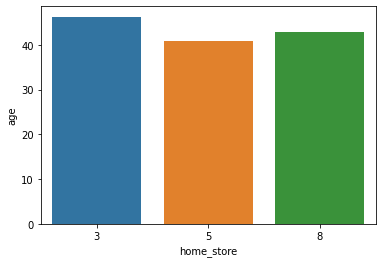

In [77]:
# Langkah 3. Plot rata-rata umur d imasing-masing store
sns.barplot(x="home_store", y="age", data=df_group_umur)
plt.show()

2. Berapakah rata rata lama berlangganan (Length of stay) dari customer? dan tampilkan distribusi dari LoS

In [78]:
# Langkah 1. Extract kolom customer since ke dalam tahun
df_cust['day_LoS'] = (dt.today() - df_cust['customer_since'].dt.date)
print(df_cust['day_LoS'])

0      2036 days
1      2033 days
2      2030 days
3      2027 days
4      2025 days
          ...   
2241   2034 days
2242   1290 days
2243   1727 days
2244   1807 days
2245   1488 days
Name: day_LoS, Length: 2246, dtype: timedelta64[ns]


In [79]:
df_cust['LoS'] = ((df_cust['day_LoS'].dt.days)/365).apply(np.floor)
df_cust

,customer_id,home_store,customer_first-name,customer_email,customer_since,loyalty_card_number,birthdate,gender,birth_year,age_days,age,day_LoS,LoS
0,1,3,Kelly Key,Venus@adipiscing.edu,2017-01-04,908-424-2890,1950-05-29,M,1950,26363 days,72.0,2036 days,5.0
1,2,3,Clark Schroeder,Nora@fames.gov,2017-01-07,032-732-6308,1950-07-30,M,1950,26301 days,72.0,2033 days,5.0
2,3,3,Elvis Cardenas,Brianna@tellus.edu,2017-01-10,459-375-9187,1950-09-30,M,1950,26239 days,71.0,2030 days,5.0
3,4,3,Rafael Estes,Ina@non.gov,2017-01-13,576-640-9226,1950-12-01,M,1950,26177 days,71.0,2027 days,5.0
4,5,3,Colin Lynn,Dale@Integer.com,2017-01-15,344-674-6569,1951-02-01,M,1951,26115 days,71.0,2025 days,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2241,8497,8,Rae,Kylie@facilisi.org,2017-01-06,081-440-6679,1977-12-10,F,1977,16306 days,44.0,2034 days,5.0
2242,8498,8,April,Daniel@placerat.us,2019-01-20,705-545-5246,2000-12-07,N,2000,7908 days,21.0,1290 days,3.0
2243,8499,8,Clementine,Dieter@ac.us,2017-11-09,297-550-7776,1996-06-04,F,1996,9555 days,26.0,1727 days,4.0
2244,8500,8,Linda,Dillon@pretium.gov,2017-08-21,255-202-7435,1990-03-01,N,1990,11842 days,32.0,1807 days,4.0


In [80]:
# Langkah 2. Rata rata LoS untuk seluruh customer dalam tahun
df_cust['LoS'].mean()

3.951914514692787

In [113]:
df_cust['LoS'].describe()

count    2246.000000
mean        3.951915
std         0.744035
min         3.000000
25%         3.000000
50%         4.000000
75%         5.000000
max         5.000000
Name: LoS, dtype: float64

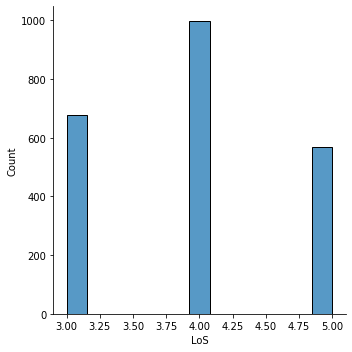

In [81]:
# Langkah 3. Distribusi plot (histogram) dari customer
sns.displot(data=df_cust, x="LoS")

3. Berapakah proporsi gender dari customer?

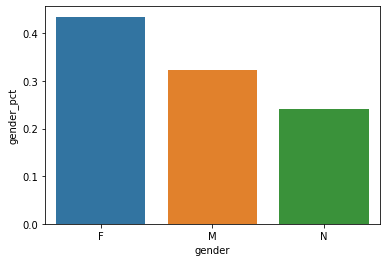

In [82]:
df_group_cust = df_cust.groupby('gender')['customer_id'].count() # menghitung jumlah masing-masing gender
df_group_cust2 = (df_group_cust/df_group_cust.sum()).reset_index() # membagi jumlah masing-masing gender dengan total customer
df_group_cust2.rename(columns = {'customer_id': 'gender_pct'}, inplace = True) # mengganti nama customer_id dengan gender_pct

sns.barplot(data = df_group_cust2, x = 'gender', y = 'gender_pct') # menampilkan proporsi gender dari semua customer

In [83]:
df_group_cust2.rename(columns = {'customer_id': 'gender_pct'}, inplace = True)
df_group_cust2

,gender,gender_pct
0,F,0.434996
1,M,0.323241
2,N,0.241763


4. Siapakah dari customer yang melakukan transaksi terbanyak?

In [84]:
df_unitprice_cust = df_sales_rcp.groupby('customer_id')['transaction_id'].count().sort_values(ascending = False).reset_index()
df_unitprice_cust

,customer_id,transaction_id
0,0,25033
1,548,31
2,8285,31
3,3,31
4,8341,29
...,...,...
2243,427,1
2244,5589,1
2245,5668,1
2246,5784,1


### Transaksi Penjualan
Transaksi per customer
1. Cek range tanggal transaksi, tampilkan table jumlah transaksi harian, lalu pada tanggal berapa transaksi terbanyak?
2. Berapakah Value transaksi / unit price customer berdasarkan (min, max, avg, std)?

1. Cek range tanggal transaksi, tampilkan table jumlah transaksi harian, lalu pada tanggal berapa transaksi terbanyak?

In [85]:
# Mengelompokkan transaksi berdasarkan tanggal
data_harian = df_sales_rcp.groupby('transaction_date')['customer_id'].size().sort_values(ascending = False)

In [86]:
data_harian = data_harian.reset_index()
data_harian.rename(columns={'customer_id':'jumlah customer'}, inplace=True)
data_harian

,transaction_date,jumlah customer
0,2019-04-19,1907
1,2019-04-16,1897
2,2019-04-27,1852
3,2019-04-08,1846
4,2019-04-18,1844
5,2019-04-15,1835
6,2019-04-13,1829
7,2019-04-24,1815
8,2019-04-17,1809
9,2019-04-10,1798


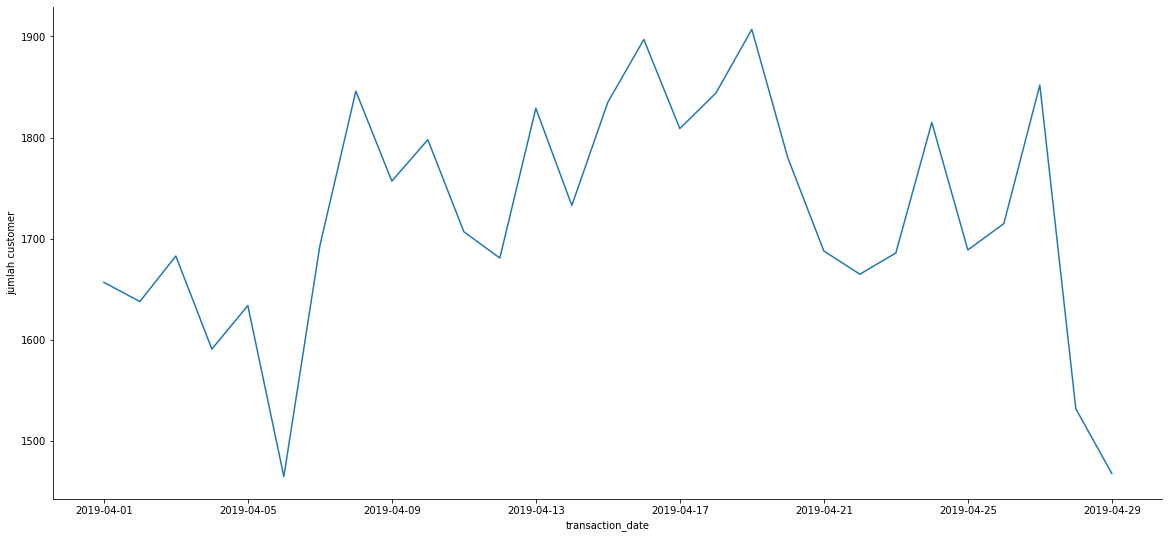

In [87]:
# Plot
g=sns.relplot(x="transaction_date", y="jumlah customer", kind="line", data=data_harian)
g.fig.set_size_inches(20,8)

2. Berapakah Value transaksi / unit price customer berdasarkan (min, max, avg, std)?

In [88]:
df_unitprice_cust = df_sales_rcp.groupby('customer_id')['unit_price'].sum().reset_index()
df_unitprice_cust['unit_price'].describe()

count     2248.000000
mean        75.121664
std       1823.951465
min          2.450000
25%         23.587500
50%         33.340000
75%         46.562500
max      86511.370000
Name: unit_price, dtype: float64

In [89]:
df_sales_rcp.head()

,transaction_id,transaction_date,transaction_time,sales_outlet_id,staff_id,customer_id,instore_yn,order,line_item_id,product_id,quantity,line_item_amount,unit_price,promo_item_yn
0,7,2019-04-01,2022-08-02 12:04:43,3,12,558,N,1,1,52,1,2.50,2.50,N
1,11,2019-04-01,2022-08-02 15:54:39,3,17,781,N,1,1,27,2,7.00,3.50,N
2,19,2019-04-01,2022-08-02 14:34:59,3,17,788,Y,1,1,46,2,5.00,2.50,N
3,32,2019-04-01,2022-08-02 16:06:04,3,12,683,N,1,1,23,2,5.00,2.50,N
4,33,2019-04-01,2022-08-02 19:18:37,3,17,99,Y,1,1,34,1,2.45,2.45,N


### Product Recommendation
1. Product jenis apa yang paling banyak terjual?
2. Cek produk terlaris pada masing-masing home store

In [90]:
df_product.head()

,product_id,product_group,product_category,product_type,product,product_description,unit_of_measure,current_wholesale_price,current_retail_price,tax_exempt_yn,promo_yn,new_product_yn,current_retail_price_value
0,1,Whole Bean/Teas,Coffee beans,Organic Beans,Brazilian - Organic,It's like Carnival in a cup. Clean and smooth.,12 oz,14.40,$18.00,Y,N,N,18.00
1,2,Whole Bean/Teas,Coffee beans,House blend Beans,Our Old Time Diner Blend,Out packed blend of beans that is reminiscent ...,12 oz,14.40,$18.00,Y,N,N,18.00
2,3,Whole Bean/Teas,Coffee beans,Espresso Beans,Espresso Roast,Our house blend for a good espresso shot.,1 lb,11.80,$14.75,Y,N,N,14.75
3,4,Whole Bean/Teas,Coffee beans,Espresso Beans,Primo Espresso Roast,Our primium single source of hand roasted beans.,1 lb,16.36,$20.45,Y,N,N,20.45
4,5,Whole Bean/Teas,Coffee beans,Gourmet Beans,Columbian Medium Roast,A smooth cup of coffee any time of day.,1 lb,12.00,$15.00,Y,N,N,15.00


1. Product jenis apa yang paling banyak terjual?

In [91]:
df_merge = pd.merge(df_sales_rcp, df_product)
df_merge

,transaction_id,transaction_date,transaction_time,sales_outlet_id,staff_id,customer_id,instore_yn,order,line_item_id,product_id,...,product_type,product,product_description,unit_of_measure,current_wholesale_price,current_retail_price,tax_exempt_yn,promo_yn,new_product_yn,current_retail_price_value
0,7,2019-04-01,2022-08-02 12:04:43,3,12,558,N,1,1,52,...,Brewed Chai tea,Traditional Blend Chai Rg,Sit back and think of the tropical breezes.,16 oz,0.63,$2.50,Y,N,N,2.50
1,249,2019-04-01,2022-08-02 11:15:38,3,12,22,Y,1,1,52,...,Brewed Chai tea,Traditional Blend Chai Rg,Sit back and think of the tropical breezes.,16 oz,0.63,$2.50,Y,N,N,2.50
2,326,2019-04-01,2022-08-02 12:05:31,3,12,659,N,1,1,52,...,Brewed Chai tea,Traditional Blend Chai Rg,Sit back and think of the tropical breezes.,16 oz,0.63,$2.50,Y,N,N,2.50
3,497,2019-04-01,2022-08-02 16:49:38,3,12,407,Y,1,1,52,...,Brewed Chai tea,Traditional Blend Chai Rg,Sit back and think of the tropical breezes.,16 oz,0.63,$2.50,Y,N,N,2.50
4,541,2019-04-01,2022-08-02 19:17:34,3,12,537,Y,1,1,52,...,Brewed Chai tea,Traditional Blend Chai Rg,Sit back and think of the tropical breezes.,16 oz,0.63,$2.50,Y,N,N,2.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49889,1318,2019-04-24,2022-08-02 09:31:54,8,42,8113,Y,7,1,11,...,Herbal tea,Lemon Grass,You will think you are Thailand as you sip you...,.9 oz,7.16,$8.95,Y,N,N,8.95
49890,659,2019-04-25,2022-08-02 06:17:12,5,26,5778,N,7,1,11,...,Herbal tea,Lemon Grass,You will think you are Thailand as you sip you...,.9 oz,7.16,$8.95,Y,N,N,8.95
49891,722,2019-04-25,2022-08-02 10:48:21,8,44,0,N,7,1,11,...,Herbal tea,Lemon Grass,You will think you are Thailand as you sip you...,.9 oz,7.16,$8.95,Y,N,N,8.95
49892,869,2019-04-25,2022-08-02 08:54:27,8,42,8039,Y,7,1,11,...,Herbal tea,Lemon Grass,You will think you are Thailand as you sip you...,.9 oz,7.16,$8.95,Y,N,N,8.95


In [92]:
# Langkah Menggabungkan tabel product dan sales reciepts
df_merge = pd.merge(df_sales_rcp, df_product)
df_merge2 = df_merge[['product', 'transaction_id']] # menampilkan kolom product dan transaction_id saja
df_merge_count = df_merge2.groupby('product')['transaction_id'].size().sort_values(ascending=False) # mengurutkan product yang terjual dari yang terbesar
df_merge_count = df_merge_count.reset_index()
df_merge_count.rename(columns={'transaction_id':'jumlah terjual'}, inplace=True) 
df_merge_count


,product,jumlah terjual
0,Chocolate Croissant,1034
1,Earl Grey Rg,1015
2,Dark chocolate Lg,1000
3,Sustainably Grown Organic Lg,995
4,Latte,993
...,...,...
75,Earl Grey,48
76,Primo Espresso Roast,47
77,Peppermint,45
78,Spicy Eye Opener Chai,42


In [93]:
df_lebih_100 = df_merge_count[['product', 'jumlah terjual']][df_merge_count['jumlah terjual']>100]
df_lebih_100.head()

,product,jumlah terjual
0,Chocolate Croissant,1034
1,Earl Grey Rg,1015
2,Dark chocolate Lg,1000
3,Sustainably Grown Organic Lg,995
4,Latte,993


In [94]:
df_merge_count.describe()

,jumlah terjual
count,80.00000
mean,623.67500
std,392.56317
min,36.00000
25%,69.00000
50%,885.00000
75%,953.00000
max,1034.00000


In [95]:
# describe_num_df = df_merge_count.describe(include=['int64','float64'])
# describe_num_df.reset_index(inplace=True)
# # To remove any variable from plot
# describe_num_df = describe_num_df[describe_num_df['index'] != 'count']
# for i in df_merge_count:
#   if i in ['index']:
#     continue
#   sns.factorplot(x="index", y=i, data=describe_num_df)
#   plt.show()

2. Cek product terlaris pada masing-masing home store?

In [96]:
best_seller = df_merge[['sales_outlet_id', 'product']]
best_seller_outlet3 = best_seller[best_seller['sales_outlet_id'] == '3'].groupby('product')['sales_outlet_id'].size().sort_values(ascending=False)
best_seller_outlet3.reset_index()

,product,sales_outlet_id
0,Earl Grey Rg,383
1,Dark chocolate Lg,377
2,Peppermint Rg,371
3,Sustainably Grown Organic Lg,365
4,Spicy Eye Opener Chai Lg,363
...,...,...
74,Serenity Green Tea,12
75,Spicy Eye Opener Chai,11
76,Earl Grey,11
77,Traditional Blend Chai,11


In [97]:
best_seller_outlet5 = best_seller[best_seller['sales_outlet_id'] == '5'].sort_index().groupby('product')['sales_outlet_id'].size().sort_values(ascending=False)
best_seller_outlet5.reset_index()

,product,sales_outlet_id
0,Chocolate Croissant,350
1,Jamaican Coffee River Lg,326
2,Peppermint Lg,318
3,Cappuccino Lg,317
4,Latte,314
...,...,...
75,Traditional Blend Chai,14
76,Lemon Grass,12
77,Dark chocolate,11
78,Primo Espresso Roast,10


In [98]:
best_seller_outlet8 = best_seller[best_seller['sales_outlet_id'] == '8'].sort_index().groupby('product')['sales_outlet_id'].size().sort_values(ascending=False)
best_seller_outlet8.reset_index()

,product,sales_outlet_id
0,Ouro Brasileiro shot,465
1,Chocolate Croissant,354
2,English Breakfast Lg,349
3,Our Old Time Diner Blend Sm,345
4,Ethiopia Lg,345
...,...,...
75,Chili Mayan,15
76,Serenity Green Tea,14
77,Spicy Eye Opener Chai,13
78,I Need My Bean! Diner mug,8


### Optimalisasi Inventory
Berapa persen product yang tersisa setiap harinya? Dan Product apa yang paling banyak tersisa?

In [99]:
df_pastry

,sales_outlet_id,transaction_date,product_id,start_of_day,quantity_sold,waste,% waste,% waste_value
0,3,4/1/2019,69,18,8,10,56%,56
1,3,4/1/2019,70,18,12,6,33%,33
2,3,4/1/2019,71,18,8,10,56%,56
3,3,4/1/2019,72,48,9,39,81%,81
4,3,4/1/2019,73,18,9,9,50%,50
...,...,...,...,...,...,...,...,...
302,8,4/27/2019,69,18,1,17,94%,94
303,8,4/27/2019,70,18,4,14,78%,78
304,8,4/27/2019,71,18,2,16,89%,89
305,8,4/27/2019,72,48,19,29,60%,60


In [115]:
data = df_pastry.groupby(['product_id', 'transaction_date', '% waste_value']).size().reset_index()
# data.rename(columns={0:'jumlah'}, inplace=True)
data

,product_id,transaction_date,% waste_value,0
0,69,4/1/2019,56,1
1,69,4/10/2019,33,1
2,69,4/10/2019,72,1
3,69,4/10/2019,78,1
4,69,4/11/2019,17,1
...,...,...,...,...
285,73,4/8/2019,56,1
286,73,4/8/2019,67,1
287,73,4/8/2019,83,1
288,73,4/9/2019,72,1


## 8. Rekomendasi

1. Coba terapkan promo teehadap beberapa product (seperti product yang tidak begitu laris) untuk menarik hati customer yang lebih muda
2. Tentukan product yang menjadi unggulan di masing-masing home store untuk menarik perhatian customer (seperti product terlaris di setiap home store)
3. Untuk meningkatkan stok produk, perhatikan produk mana yang paling banyak tersisa setiap harinya agar ke depannya boisa diperkirakan lagi berapa stok produk di setiap home store untuk masing-masing jenis produk sehingga tidak banyak produk yang tersisa. 



## 9. Kesimpulan - Create the story

1. Rata-rata usia customer adalah 43 tahun dengan rata-rata berlangganan yaitu selama 4 tahun.  
2. Distribusi gender customer yaitu, Female: 977, Male: 726, dan None: 543
3. Transaksi terbanyak terjadi pada 19 April 2019 dan customer yang melakukan transaksi terbanyak adalah customer dengan nama depan Summer dengan jumlah transaksi 76 kali. 
3. Hanya terdapat 3 home store yang beroperasi pada April 2019 di Coffee Shop ini yaitu Home Store 3, 5, dan 8.
4. Tiga produk terlaris pada masing-masing home store adalah: 
- Home Store 3: Earl Grey Rg, Dark Chocolate Lg, dan Peppermint Rg
- Home Store 5: Chocolate Croissant, Jamaican Coffee River Lg, dan Peppermint Lg
- Home Store 8: Ouro Brasileiro Shot, Chocolate Croissant, dan English Breakfast Lg